In [1]:
import pandas as pd
import numpy as np
import scipy
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
import seaborn as sns

In [2]:
Avocados = pd.read_csv('/Users/briellewoodson/Documents/avocados.csv')

In [3]:
Avocados.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,12/27/2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,12/20/2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,12/13/2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,12/6/2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,11/29/2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [5]:
region = ['Indianapolis', 'Orlando','PhoenixTuscan']
Avocados1 = Avocados['region'].isin(region)
Avocados2 = Avocados[Avocados1].copy()

In [6]:
Avocados3 = Avocados2[['region','Total Volume']]

In [7]:
Avocados3.head()

,region,Total Volume
988,Indianapolis,123096.09
989,Indianapolis,116353.68
990,Indianapolis,125342.89
991,Indianapolis,145740.44
992,Indianapolis,108444.41


In [8]:
Avocados3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 676 entries, 988 to 17984
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   region        676 non-null    object 
 1   Total Volume  676 non-null    float64
dtypes: float64(1), object(1)
memory usage: 15.8+ KB


In [19]:
Avocados3['Total Volume'] = Avocados3['Total Volume'].astype(int)

/var/folders/m7/33y8yq913lx6dyz31pj10sp80000gn/T/ipykernel_3029/4009657127.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Avocados3['Total Volume'] = Avocados3['Total Volume'].astype(int)


In [20]:
Avocados3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 676 entries, 988 to 17984
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   region        676 non-null    object
 1   Total Volume  676 non-null    int64 
 2   regionR       676 non-null    int64 
 3   region_R      676 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 26.4+ KB


In [21]:
def recode (series):
    if series == "Indianapolis": 
        return 0
    if series == "Orlando": 
        return 1
    if series == "PhoenixTuscan": 
        return 2

Avocados3['regionR'] = Avocados3['region'].apply(recode)

/var/folders/m7/33y8yq913lx6dyz31pj10sp80000gn/T/ipykernel_3029/3051118156.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Avocados3['regionR'] = Avocados3['region'].apply(recode)


In [22]:
Avocados3.head()

,region,Total Volume,regionR,region_R
988,Indianapolis,123096,0,0
989,Indianapolis,116353,0,0
990,Indianapolis,125342,0,0
991,Indianapolis,145740,0,0
992,Indianapolis,108444,0,0


In [23]:
Avocados4 = Avocados3[['regionR','Total Volume']]

In [24]:
Avocados4.head()

,regionR,Total Volume
988,0,123096
989,0,116353
990,0,125342
991,0,145740
992,0,108444


/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total Volume', ylabel='Density'>

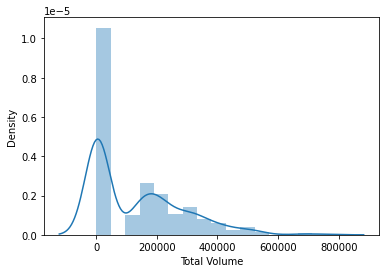

In [25]:
sns.distplot(Avocados4['Total Volume'])

In [26]:
#Square Root it
Avocados4['Total VolumeSQRT'] = np.sqrt(Avocados4['Total Volume'])

/var/folders/m7/33y8yq913lx6dyz31pj10sp80000gn/T/ipykernel_3029/2803852918.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Avocados4['Total VolumeSQRT'] = np.sqrt(Avocados4['Total Volume'])


/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total VolumeSQRT', ylabel='Density'>

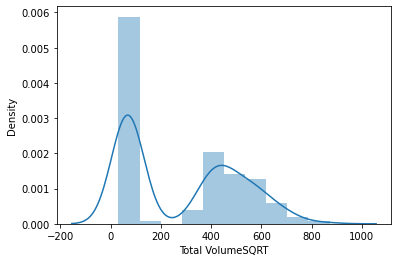

In [27]:
sns.distplot(Avocados4['Total VolumeSQRT'])

In [28]:
#Try log
Avocados4['Total VolumeLOG'] = np.log(Avocados4['Total Volume'])

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total VolumeLOG', ylabel='Density'>

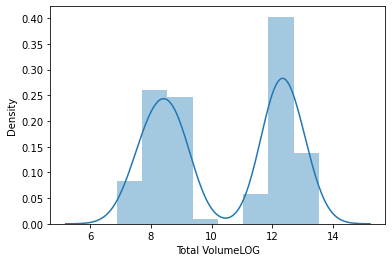

In [29]:
sns.distplot(Avocados4['Total VolumeLOG'])

In [31]:
#Homogenity Varience: Barlett's test
scipy.stats.bartlett(Avocados4['Total VolumeSQRT'], Avocados4['regionR'])

BartlettResult(statistic=7320.6713488457035, pvalue=0.0)

In [33]:
#Fligners Test
scipy.stats.fligner(Avocados4['Total VolumeSQRT'], Avocados4['regionR'])

FlignerResult(statistic=886.1397374938715, pvalue=1.0113492086040532e-194)

In [ ]:
#Both p values < .05, violated assumption of homogenity variance

In [34]:
Avocados4.groupby('regionR').mean()

,Total Volume,Total VolumeSQRT,Total VolumeLOG
regionR,,,
0,89536.180473,240.444255,10.157488
1,173551.840237,324.643652,10.586681


In [36]:
postHoc = MultiComparison(Avocados4['Total VolumeSQRT'], Avocados4['regionR'])
postHocResults = postHoc.tukeyhsd()
print(postHocResults)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower   upper   reject
----------------------------------------------------
     0      1  84.1994   0.0 50.3964 118.0024   True
----------------------------------------------------


#Based on the means of Total Volumes for the regions, there is a difference in the total volume of avocados sold. Orlando sold a higher volume of avocados than Indianapolis.